## ロジスティック回帰
- 実際のデータを使ってロジスティック回帰を行う

In [1]:
# %matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [2]:
### coding: UTF-8

### from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt


### 1. データの読み込み

In [3]:
df_house = pd.read_csv("../1_data/kc_house_data.csv")[['yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']]
df_house['yr_renovated'] = df_house['yr_renovated'] > 0 

# 先程と似た中古住宅のデータ
display(df_house.head())
df_house.describe()

,yr_renovated,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
0,False,1180,5650,1180,1955,1340,5650
1,True,2570,7242,2170,1951,1690,7639
2,False,770,10000,770,1933,2720,8062
3,False,1960,5000,1050,1965,1360,5000
4,False,1680,8080,1680,1987,1800,7503


,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,1.510697e+04,1788.390691,1971.005136,1986.552492,12768.455652
std,918.440897,4.142051e+04,828.090978,29.373411,685.391304,27304.179631
min,290.000000,5.200000e+02,290.000000,1900.000000,399.000000,651.000000
25%,1427.000000,5.040000e+03,1190.000000,1951.000000,1490.000000,5100.000000
50%,1910.000000,7.618000e+03,1560.000000,1975.000000,1840.000000,7620.000000
75%,2550.000000,1.068800e+04,2210.000000,1997.000000,2360.000000,10083.000000
max,13540.000000,1.651359e+06,9410.000000,2015.000000,6210.000000,871200.000000


### 2. [演習] Scikit-learnを用いてロジスティック回帰を実装してみましょう
- yr_renovatedが1になるかどうかを予測してみましょう
- 学習後の重みw0, w1, ..., w6を表示してみましょう
- 実際に予測してみて，対数尤度・正答率を表示してみましょう
- 最後に正解と予測値のクロス集計の結果を表示してみましょう

In [4]:
y = df_house["yr_renovated"].values
X = df_house.drop('yr_renovated', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6))

w0 = 46.769, w1 = 2440.395, w2 = -2142.859, w3 = -1026.253, w4 = -798.640, w5 = -865.242, w6 = -3072.451


In [5]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -1.461
正答率 = 95.771%


In [6]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = リノベーションなし', '正解 = リノベーション済み'], 
                        columns=['予測 = リノベーションなし', '予測 = リノベーション済み'])
conf_mat

,予測 = リノベーションなし,予測 = リノベーション済み
正解 = リノベーションなし,20699,0
正解 = リノベーション済み,914,0


## リノベーションなし・済みのグラフ描画

###  'sqft_living', 'sqft_lot'とリノベーションの関係

In [7]:
df_house[df_house['yr_renovated']==True].count()

yr_renovated     914
sqft_living      914
sqft_lot         914
sqft_above       914
yr_built         914
sqft_living15    914
sqft_lot15       914
dtype: int64

<IPython.core.display.Javascript object>


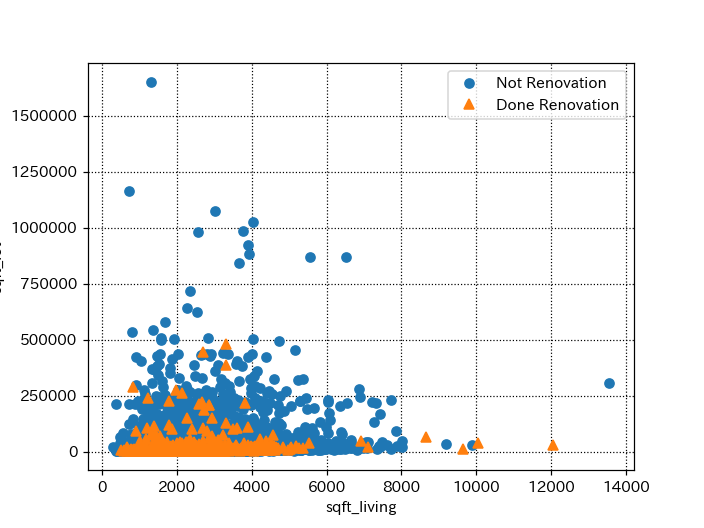

In [8]:
data1 = df_house[df_house['yr_renovated']==False][['sqft_living', 'sqft_lot']]
data2 = df_house[df_house['yr_renovated']==True ][['sqft_living', 'sqft_lot']]

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1['sqft_living'], data1['sqft_lot'], 'o', color='C0', label='Not Renovation')
plt.plot(data2['sqft_living'], data2['sqft_lot'], '^', color='C1', label='Done Renovation')
plt.legend(loc='best')
plt.xlabel("sqft_living")
plt.ylabel("sqft_lot")
plt.show()

<IPython.core.display.Javascript object>


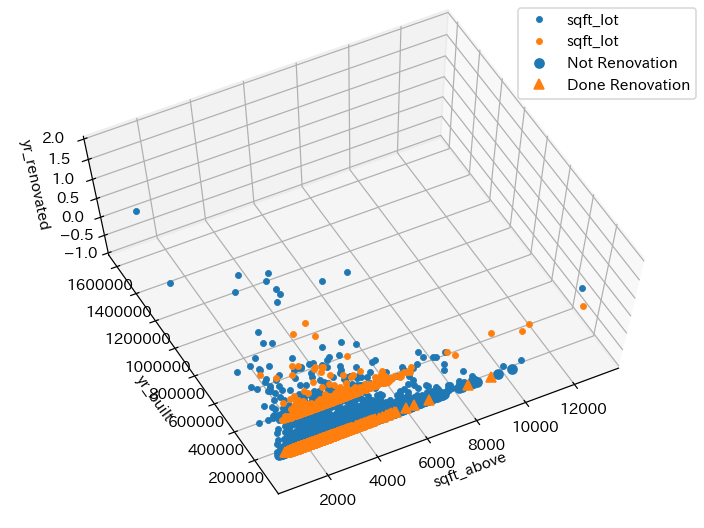

In [10]:
# データ作成
d1 = df_house[df_house['yr_renovated']==False][['yr_renovated', 'sqft_living', 'sqft_lot']]
d2 = df_house[df_house['yr_renovated']==True ][['yr_renovated', 'sqft_living', 'sqft_lot']]
d1['yr_renovated'] = d1['yr_renovated'].astype(int)
d2['yr_renovated'] = d2['yr_renovated'].astype(int)

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("sqft_living")
ax.set_ylabel("sqft_lot")
ax.set_zlabel("yr_renovated")

# 表示範囲の設定
ax.set_xlim(min(min(data1['sqft_living']), min(data2['sqft_living'])),
            max(max(data1['sqft_living']), max(data2['sqft_living'])))
ax.set_ylim(min(min(data1['sqft_lot']), min(data2['sqft_lot']))-1, 
            max(max(data1['sqft_lot']), max(data2['sqft_lot']))+1)
ax.set_zlim(-1, 2)

# グラフ描画
ax.plot(d1[:]["sqft_living"], d1[:]["sqft_lot"], d1[:]["yr_renovated"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["sqft_living"], d2[:]["sqft_lot"], d2[:]["yr_renovated"], 
        "o", color="C1", ms=4, mew=0.5)
plt.show()

###  'sqft_above', 'yr_built'とリノベーションの関係

In [11]:
data1 = df_house[df_house['yr_renovated']==False][['sqft_above', 'yr_built']]
data2 = df_house[df_house['yr_renovated']==True ][['sqft_above', 'yr_built']]

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1['sqft_above'], data1['yr_built'], 'o', color='C0', label='Not Renovation')
plt.plot(data2['sqft_above'], data2['yr_built'], '^', color='C1', label='Done Renovation')
plt.legend(loc='best')
plt.xlabel("sqft_above")
plt.ylabel("yr_built")
plt.show()

<IPython.core.display.Javascript object>


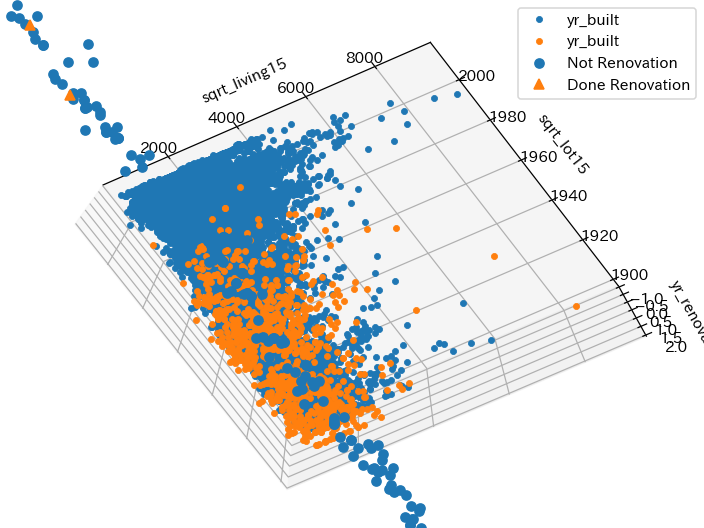

In [12]:
# データ作成
d1 = df_house[df_house['yr_renovated']==False][['yr_renovated', 'sqft_above', 'yr_built']]
d2 = df_house[df_house['yr_renovated']==True ][['yr_renovated', 'sqft_above', 'yr_built']]
d1['yr_renovated'] = d1['yr_renovated'].astype(int)
d2['yr_renovated'] = d2['yr_renovated'].astype(int)

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("sqft_above")
ax.set_ylabel("yr_built")
ax.set_zlabel("yr_renovated")

# 表示範囲の設定
ax.set_xlim(min(min(data1['sqft_above']), min(data2['sqft_above'])),
            max(max(data1['sqft_above']), max(data2['sqft_above'])))
ax.set_ylim(min(min(data1['yr_built']), min(data2['yr_built']))-1, 
            max(max(data1['yr_built']), max(data2['yr_built']))+1)
ax.set_zlim(-1, 2)

# グラフ描画
ax.plot(d1[:]["sqft_above"], d1[:]["yr_built"], d1[:]["yr_renovated"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["sqft_above"], d2[:]["yr_built"], d2[:]["yr_renovated"], 
        "o", color="C1", ms=4, mew=0.5)
plt.show()

###  'sqft_living15', 'sqft_lot15'とリノベーションの関係

In [13]:
data1 = df_house[df_house['yr_renovated']==False][['sqft_living15', 'sqft_lot15']]
data2 = df_house[df_house['yr_renovated']==True ][['sqft_living15', 'sqft_lot15']]

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(data1['sqft_living15'], data1['sqft_lot15'], 'o', color='C0', label='Not Renovation')
plt.plot(data2['sqft_living15'], data2['sqft_lot15'], '^', color='C1', label='Done Renovation')
plt.legend(loc='best')
plt.xlabel("sqrt_living15")
plt.ylabel("sqrt_lot15")
plt.show()

<IPython.core.display.Javascript object>


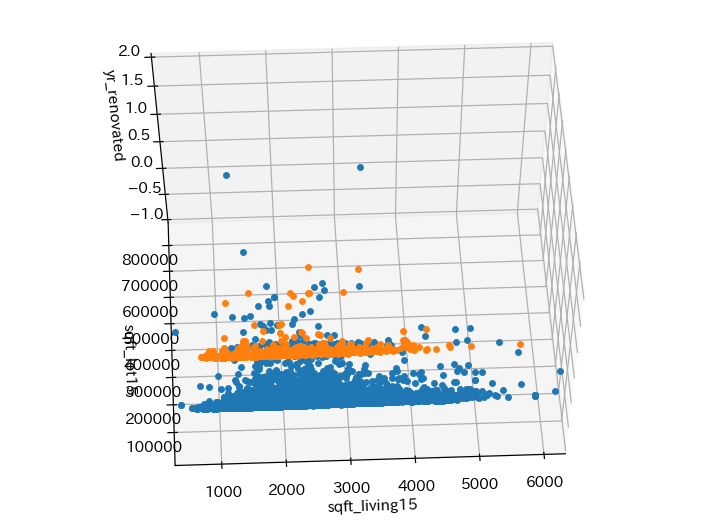

In [14]:
# データ作成
d1 = df_house[df_house['yr_renovated']==False][['yr_renovated', 'sqft_living15', 'sqft_lot15']]
d2 = df_house[df_house['yr_renovated']==True ][['yr_renovated', 'sqft_living15', 'sqft_lot15']]
d1['yr_renovated'] = d1['yr_renovated'].astype(int)
d2['yr_renovated'] = d2['yr_renovated'].astype(int)

# グラフ作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("sqft_living15")
ax.set_ylabel("sqft_lot15")
ax.set_zlabel("yr_renovated")

# 表示範囲の設定
ax.set_xlim(min(min(data1['sqft_living15']), min(data2['sqft_living15'])),
            max(max(data1['sqft_living15']), max(data2['sqft_living15'])))
ax.set_ylim(min(min(data1['sqft_lot15']), min(data2['sqft_lot15']))-1, 
            max(max(data1['sqft_lot15']), max(data2['sqft_lot15']))+1)
ax.set_zlim(-1, 2)

# グラフ描画
ax.plot(d1[:]["sqft_living15"], d1[:]["sqft_lot15"], d1[:]["yr_renovated"], 
        "o", color="C0", ms=4, mew=0.5)
ax.plot(d2[:]["sqft_living15"], d2[:]["sqft_lot15"], d2[:]["yr_renovated"], 
        "o", color="C1", ms=4, mew=0.5)
plt.show()